## Search for the Cycle
----
### Система 1 (вариант 4)

Рассмотрим модель биологического сообщества хищник-жертва, учитывающей
существование нижней критической плотности популяции жертвы,
а также учитывающей миграцию популяций хищников и жертв:

$$
\begin{cases}
\dot N_1 = (\epsilon_1 - \gamma_1 N_1)N_1 - d(N_1 - N_2), \\
\dot N_2 = \epsilon_1 N_2 (N_2 - L) \frac{K - N_2}{K} - \alpha N_2 N_3 + d(N_1 - N_2), \\
\dot N_3 = -\epsilon_3 N_3 + k \alpha N_2 N_3,
\end{cases}
$$

где $N_1(t)$ – плотность популяции жертв, недостижимых для хищников, $N_2(t)$
– плотность популяции жертв, достижимых для хищников, $N_3(t)$ – плотность
популяции хищников; $\epsilon_i$, $\gamma_i$, $\alpha$, $k$, $K$, $d$ – положительные константы.

In [102]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import *
from IPython.display import display
from scipy.optimize import fsolve

In [103]:
cycle_parameters = {
    'epsilon_1': 0.57,
    'gamma_1': 0.54,
    'd': 1.0,
    'L': 1.37,
    'K': 0.36,
    'alpha': 0.89,
    'epsilon_3': 0.27,
    'k': 1.0
}

unstable_equilibrium_point = {
    'N_01': 0.45056835,
    'N_02': 0.30337079,
    'N_03': 0.43771877
}

default_initial_point = {
    'N_01': 0.97,
    'N_02': 0.83,
    'N_03': 0.84
}

def N_dot(N, t=0, parameters=cycle_parameters):
    epsilon_1 = parameters['epsilon_1']
    gamma_1 = parameters['gamma_1']
    d = parameters['d']
    L = parameters['L']
    K = parameters['K']
    alpha = parameters['alpha']
    epsilon_3 = parameters['epsilon_3']
    k = parameters['k']

    N_dot_1 = (epsilon_1 - gamma_1 * N[0]) * N[0] - d * (N[0] - N[1])
    N_dot_2 = epsilon_1 * N[1] * (N[1] - L) * (K - N[1]) / K - alpha * N[1] * N[2] + d * (N[0] - N[1])
    N_dot_3 = -epsilon_3 * N[2] + k * alpha * N[1] * N[2]
    return np.array([N_dot_1, N_dot_2, N_dot_3])

def plot(ax, parameters, initial_point):
    interval = np.arange(0, 1.2, 0.2)
    states = np.meshgrid(interval, interval, interval)
    velocities = N_dot(states)

    t = np.arange(0, 500, 0.1)
    N_init = np.array([initial_point['N_01'], initial_point['N_02'], initial_point['N_03']])
    N_dot_fixed_params = lambda N, t: N_dot(N, t, parameters)
    N = odeint(N_dot_fixed_params, N_init, t)
    
    x, y, z = states
    u, v, w = velocities
    
    ax.cla()
    ax.quiver(x, y, z, u, v, w, length=0.15)
    
    ax.plot(N[:,0], N[:,1], N[:,2], color='r')

    ax.set_xlabel('$N_1$')
    ax.set_ylabel('$N_2$')
    ax.set_zlabel('$N_3$')
    
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.1])
    ax.set_zlim([-0.1, 1.1])

    plt.show()

In [104]:
# Initialize parameters and init point for interactive plot.
# If you run this cell, all the parameters you set via sliders will be set to default.
parameters = cycle_parameters.copy()
initial_point = default_initial_point.copy()

<IPython.core.display.Javascript object>


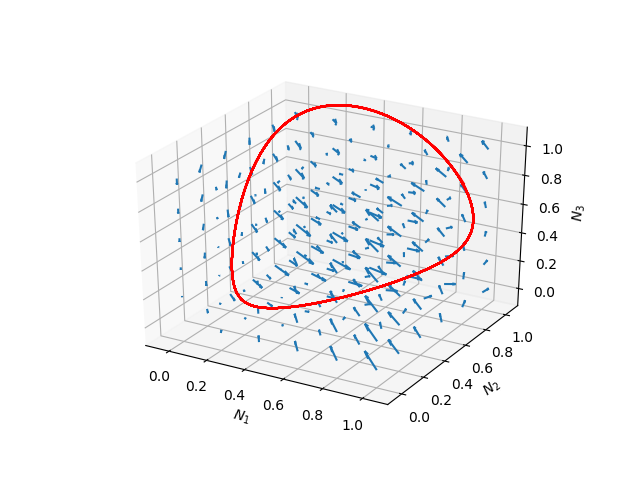

In [105]:
interactive_plot = plt.figure('Interactive Plot')
interactive_plot_ax = interactive_plot.gca(projection='3d')


epsilon_1_slider = FloatSlider(description='$\epsilon_1$',
                               min=0.01, max=10, step=0.01,
                               value=parameters['epsilon_1'])
def epsilon_1_observer(info):
    global parameters
    parameters['epsilon_1'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
epsilon_1_slider.observe(epsilon_1_observer, names='value')


gamma_1_slider = FloatSlider(description='$\gamma_1$',
                             min=0.01, max=10, step=0.01,
                             value=parameters['gamma_1'])
def gamma_1_observer(info):
    global parameters
    parameters['gamma_1'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
gamma_1_slider.observe(gamma_1_observer, names='value')


d_slider = FloatSlider(description='$d$',
                       min=0.01, max=10, step=0.01,
                       value=parameters['d'])
def d_observer(info):
    global parameters
    parameters['d'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
d_slider.observe(d_observer, names='value')


L_slider = FloatSlider(description='$L$',
                       min=-10, max=10, step=0.01,
                       value=parameters['L'])
def L_observer(info):
    global parameters
    parameters['L'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
L_slider.observe(L_observer, names='value')


K_slider = FloatSlider(description='$K$',
                       min=0.01, max=10, step=0.01,
                       value=parameters['K'])
def K_observer(info):
    global parameters
    parameters['K'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
K_slider.observe(K_observer, names='value')


alpha_slider = FloatSlider(description='$\\alpha$',
                           min=0.01, max=10, step=0.01,
                           value=parameters['alpha'])
def alpha_observer(info):
    global parameters
    parameters['alpha'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
alpha_slider.observe(alpha_observer, names='value')


epsilon_3_slider = FloatSlider(description='$\epsilon_3$',
                               min=0.01, max=10, step=0.01,
                               value=parameters['epsilon_3'])
def epsilon_3_observer(info):
    global parameters
    parameters['epsilon_3'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
epsilon_3_slider.observe(epsilon_3_observer, names='value')


k_slider = FloatSlider(description='$k$',
                       min=0.01, max=10, step=0.01,
                       value=parameters['k'])
def k_observer(info):
    global parameters
    parameters['k'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
k_slider.observe(k_observer, names='value')


N_01_slider = FloatSlider(description='$N_{01}$',
                          min=0.01, max=1, step=0.01,
                          value=initial_point['N_01'])
def N_01_observer(info):
    global initial_point
    initial_point['N_01'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
N_01_slider.observe(N_01_observer, names='value')


N_02_slider = FloatSlider(description='$N_{02}$',
                          min=0.01, max=1, step=0.01,
                          value=initial_point['N_02'])
def N_02_observer(info):
    global initial_point
    initial_point['N_02'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
N_02_slider.observe(N_02_observer, names='value')


N_03_slider = FloatSlider(description='$N_{03}$',
                          min=0.01, max=1, step=0.01,
                          value=initial_point['N_03'])
def N_03_observer(info):
    global initial_point
    initial_point['N_03'] = info.new
    plot(interactive_plot_ax, parameters, initial_point)
N_03_slider.observe(N_03_observer, names='value')

vbox1 = VBox([epsilon_1_slider, gamma_1_slider, d_slider, L_slider])
vbox2 = VBox([K_slider, alpha_slider, epsilon_3_slider, k_slider])
vbox3 = VBox([N_01_slider, N_02_slider, N_03_slider])
hbox = HBox([vbox1, vbox2, vbox3])
display(hbox)

plot(interactive_plot_ax, parameters, initial_point)

## Separate Cycle Visualisation
----

<IPython.core.display.Javascript object>


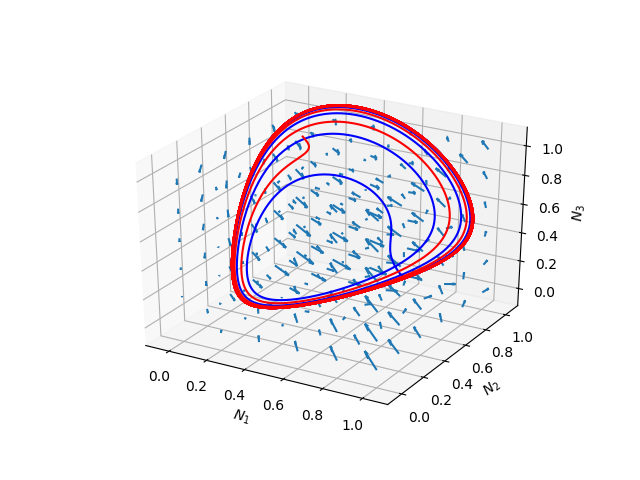

In [106]:
fig = plt.figure('Limit Cycle Demo')
ax = fig.gca(projection='3d')

interval = np.arange(0, 1.2, 0.2)
states = np.meshgrid(interval, interval, interval)
velocities = N_dot(states)

t = np.arange(0, 300, 0.1)

N_init_1 = np.array([0.9, 0.4, 0.4])
N_1 = odeint(N_dot, N_init_1, t)

N_init_2 = np.array([0.1, 0.9, 0.9])
N_2 = odeint(N_dot, N_init_2, t)


x, y, z = states
u, v, w = velocities
    
ax.cla()
ax.quiver(x, y, z, u, v, w, length=0.15)

ax.plot(N_1[:,0], N_1[:,1], N_1[:,2], color='b')
ax.plot(N_2[:,0], N_2[:,1], N_2[:,2], color='r')

ax.set_xlabel('$N_1$')
ax.set_ylabel('$N_2$')
ax.set_zlabel('$N_3$')
    
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_zlim([-0.1, 1.1])
    
plt.show()

## Checking via Jacobi Matrix
---

Here's how our system looks once again:

$$
\begin{cases}
\dot N_1 = (\epsilon_1 - \gamma_1 N_1)N_1 - d(N_1 - N_2), \\
\dot N_2 = \epsilon_1 N_2 (N_2 - L) \frac{K - N_2}{K} - \alpha N_2 N_3 + d(N_1 - N_2), \\
\dot N_3 = -\epsilon_3 N_3 + k \alpha N_2 N_3,
\end{cases}
$$

The Jacobi matrix is

$$
J(N) =
\frac{\partial \dot N}{\partial N}
= \left (
\begin{array}\
\frac{\partial \dot N_1}{\partial N_1} &
\frac{\partial \dot N_1}{\partial N_2} &
\frac{\partial \dot N_1}{\partial N_3} \\
\frac{\partial \dot N_2}{\partial N_1} &
\frac{\partial \dot N_2}{\partial N_2} &
\frac{\partial \dot N_2}{\partial N_3} \\
\frac{\partial \dot N_3}{\partial N_1} &
\frac{\partial \dot N_3}{\partial N_2} &
\frac{\partial \dot N_3}{\partial N_3} \\
\end{array}
\right )
$$

Separately, these are:

$$
\begin{array}{lll}\
\frac{\partial \dot N_1}{\partial N_1} = (\epsilon_1 - \gamma_1 N_1) - \gamma_1 N_1^2 - d N_1 &
\frac{\partial \dot N_1}{\partial N_2} = d &
\frac{\partial \dot N_1}{\partial N_3} = 0 \\
\frac{\partial \dot N_2}{\partial N_1} = d &
\frac{\partial \dot N_2}{\partial N_2} =
   2 \epsilon_1 N_2 - \frac{3 \epsilon_1}{K} N_2^2 - \epsilon_1 L
   + \frac{2 \epsilon_1 L}{K} N_2 - \alpha N_3 - d &
\frac{\partial \dot N_2}{\partial N_3} = - \alpha N_2 \\
\frac{\partial \dot N_3}{\partial N_1} = 0 &
\frac{\partial \dot N_3}{\partial N_2} = k \alpha N_3 &
\frac{\partial \dot N_3}{\partial N_3} = -\epsilon_3 + k \alpha N_2 \\
\end{array}
$$

## Search for Equilibria
---

In [107]:
N_dot_fixed_params = lambda N: N_dot(N, 0, cycle_parameters)

init = [.5, .5, .5]
equlibrium_pt = fsolve(N_dot_fixed_params, init)
print(f'For initial point {init} we get equilibrium point {equlibrium_pt}.')

init = [.3, .3, .3]
equlibrium_pt = fsolve(N_dot_fixed_params, init)
print(f'For initial point {init} we get equilibrium point {equlibrium_pt}.')

For initial point [0.5, 0.5, 0.5] we get equilibrium point [ 0.45056835  0.30337079  0.43771877].
For initial point [0.3, 0.3, 0.3] we get equilibrium point [ 0.45056835  0.30337079  0.43771877].


## Tackle The Parameters to Get a Homoclinic Orbit
---

In [108]:
def plot_cycle(ax, parameters, initial_point):
    t = np.arange(0, 500, 0.1)
    N_init = np.array([initial_point['N_01'], initial_point['N_02'], initial_point['N_03']])
    N_unstable_point = np.array([
        unstable_equilibrium_point['N_01'],
        unstable_equilibrium_point['N_02'],
        unstable_equilibrium_point['N_03']
    ])
    N_dot_fixed_params = lambda N, t: N_dot(N + N_unstable_point, t, parameters)
    N = odeint(N_dot_fixed_params, N_init, t)
    
    ax.cla()
    
    # Throw away first 2/3 of the points
    N_new = N[round(len(N) * 2 / 3):]
    ax.plot(N_new[:,0], N_new[:,1], N_new[:,2], color='r')

    ax.set_xlabel('$N_1$')
    ax.set_ylabel('$N_2$')
    ax.set_zlabel('$N_3$')

    ax.set_xlim([-0.3, 1.5])
    ax.set_ylim([-0.3, 1.5])
    ax.set_zlim([-0.3, 1.5])

    plt.show()

<IPython.core.display.Javascript object>


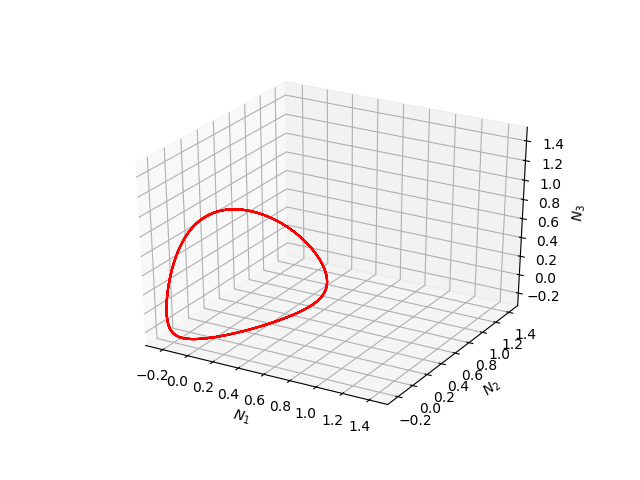

In [109]:
interactive_cycle_plot = plt.figure('Interactive Cycle Plot')
interactive_cycle_plot_ax = interactive_cycle_plot.gca(projection='3d')


epsilon_1_slider_for_cycle = FloatSlider(description='$\epsilon_1$',
                               min=0.01, max=10, step=0.01,
                               value=parameters['epsilon_1'])
def epsilon_1_observer(info):
    global parameters
    parameters['epsilon_1'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
epsilon_1_slider_for_cycle.observe(epsilon_1_observer, names='value')


gamma_1_slider_for_cycle = FloatSlider(description='$\gamma_1$',
                             min=0.01, max=10, step=0.01,
                             value=parameters['gamma_1'])
def gamma_1_observer(info):
    global parameters
    parameters['gamma_1'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
gamma_1_slider_for_cycle.observe(gamma_1_observer, names='value')


d_slider_for_cycle = FloatSlider(description='$d$',
                       min=0.01, max=10, step=0.01,
                       value=parameters['d'])
def d_observer(info):
    global parameters
    parameters['d'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
d_slider_for_cycle.observe(d_observer, names='value')


L_slider_for_cycle = FloatSlider(description='$L$',
                       min=-10, max=10, step=0.01,
                       value=parameters['L'])
def L_observer(info):
    global parameters
    parameters['L'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
L_slider_for_cycle.observe(L_observer, names='value')


K_slider_for_cycle = FloatSlider(description='$K$',
                       min=0.01, max=10, step=0.01,
                       value=parameters['K'])
def K_observer(info):
    global parameters
    parameters['K'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
K_slider_for_cycle.observe(K_observer, names='value')


alpha_slider_for_cycle = FloatSlider(description='$\\alpha$',
                           min=0.01, max=10, step=0.01,
                           value=parameters['alpha'])
def alpha_observer(info):
    global parameters
    parameters['alpha'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
alpha_slider_for_cycle.observe(alpha_observer, names='value')


epsilon_3_slider_for_cycle = FloatSlider(description='$\epsilon_3$',
                               min=0.01, max=10, step=0.01,
                               value=parameters['epsilon_3'])
def epsilon_3_observer(info):
    global parameters
    parameters['epsilon_3'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
epsilon_3_slider_for_cycle.observe(epsilon_3_observer, names='value')


k_slider_for_cycle = FloatSlider(description='$k$',
                       min=0.01, max=10, step=0.01,
                       value=parameters['k'])
def k_observer(info):
    global parameters
    parameters['k'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
k_slider_for_cycle.observe(k_observer, names='value')


N_01_slider_for_cycle = FloatSlider(description='$N_{01}$',
                          min=0.01, max=1, step=0.01,
                          value=initial_point['N_01'])
def N_01_observer(info):
    global initial_point
    initial_point['N_01'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
N_01_slider_for_cycle.observe(N_01_observer, names='value')


N_02_slider_for_cycle = FloatSlider(description='$N_{02}$',
                          min=0.01, max=1, step=0.01,
                          value=initial_point['N_02'])
def N_02_observer(info):
    global initial_point
    initial_point['N_02'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
N_02_slider_for_cycle.observe(N_02_observer, names='value')


N_03_slider_for_cycle = FloatSlider(description='$N_{03}$',
                          min=0.01, max=1, step=0.01,
                          value=initial_point['N_03'])
def N_03_observer(info):
    global initial_point
    initial_point['N_03'] = info.new
    plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)
N_03_slider_for_cycle.observe(N_03_observer, names='value')

vbox1 = VBox([epsilon_1_slider_for_cycle, gamma_1_slider_for_cycle, d_slider_for_cycle, L_slider_for_cycle])
vbox2 = VBox([K_slider_for_cycle, alpha_slider_for_cycle, epsilon_3_slider_for_cycle, k_slider_for_cycle])
vbox3 = VBox([N_01_slider_for_cycle, N_02_slider_for_cycle, N_03_slider_for_cycle])
hbox = HBox([vbox1, vbox2, vbox3])
display(hbox)

plot_cycle(interactive_cycle_plot_ax, parameters, initial_point)